In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import random

Setup

In [4]:
import numpy as np
import keras
from keras import layers

Prepare the data

In [43]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


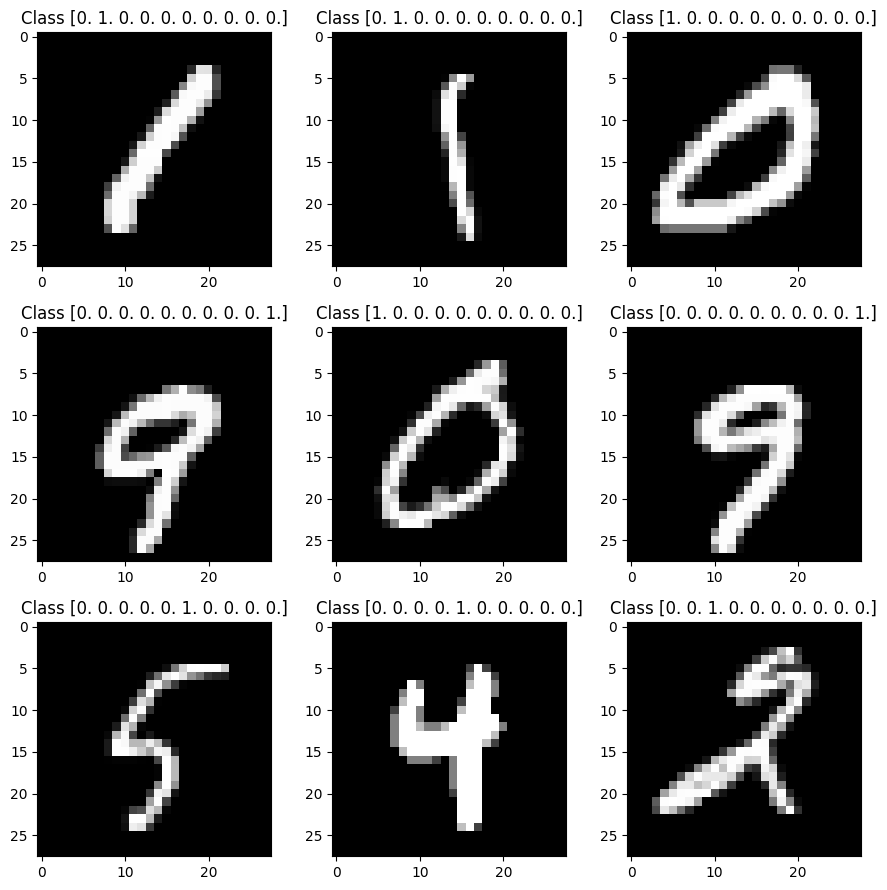

In [6]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

Build the model

The **Dropout** layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.

In [7]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

Train the model

In [27]:
batch_size = 128
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 37s 84ms/step - loss: 0.0847 - accuracy: 0.9744 - val_loss: 0.0446 - val_accuracy: 0.9873
Epoch 2/20
422/422 [==============================] - 36s 86ms/step - loss: 0.0679 - accuracy: 0.9792 - val_loss: 0.0400 - val_accuracy: 0.9888
Epoch 3/20
422/422 [==============================] - 37s 89ms/step - loss: 0.0589 - accuracy: 0.9814 - val_loss: 0.0335 - val_accuracy: 0.9918
Epoch 4/20
422/422 [==============================] - 35s 82ms/step - loss: 0.0550 - accuracy: 0.9830 - val_loss: 0.0323 - val_accuracy: 0.9912
Epoch 5/20
422/422 [==============================] - 36s 85ms/step - loss: 0.0488 - accuracy: 0.9848 - val_loss: 0.0358 - val_accuracy: 0.9895
Epoch 6/20
422/422 [==============================] - 36s 85ms/step - loss: 0.0452 - accuracy: 0.9856 - val_loss: 0.0285 - val_accuracy: 0.9922
Epoch 7/20
422/422 [==============================] - 37s 89ms/step - loss: 0.0419 - accuracy: 0.9865 - val_loss: 0.0306 - val_accuracy:

verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

verbose=0 will show you nothing (silent)

verbose=1 will show you an animated progress bar like this:

progres_bar

verbose=2 will just mention the number of epoch like this:



Evaluate the trained model

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.021138587966561317
Test accuracy: 0.9930999875068665


Save the Model

In [29]:
model.save("final_model.keras")

Reload Model

In [30]:
model = keras.saving.load_model("final_model.keras")

Next, you can query predictions of class probabilities with predict():

313/313 [==============================] - 2s 6ms/step


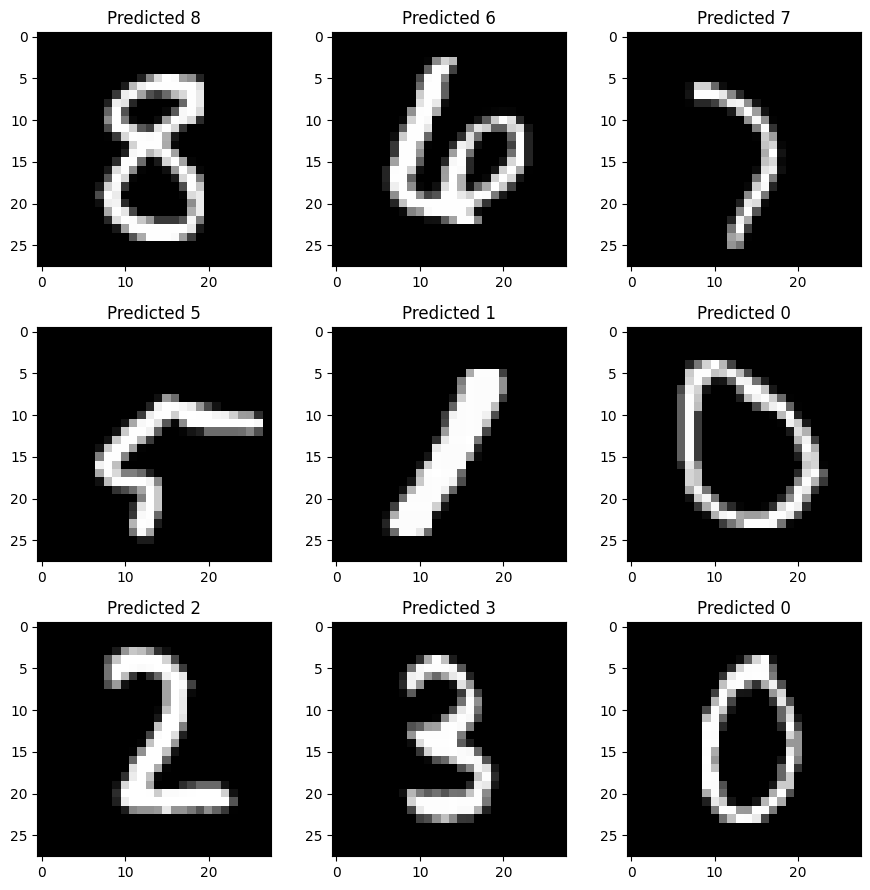

In [64]:
predictions = model.predict(x_test)

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_test))
    plt.imshow(x_test[num], cmap='gray', interpolation='none')
    plt.title("Predicted {}".format(np.argmax(predictions[num])))


plt.tight_layout()

